<a href="https://colab.research.google.com/github/LiamTurner4/strategy-strength-classifier/blob/main/Strategy_Strength_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np

In [ ]:
# download historical market data (SPY)
data = yf.download("SPY", start="2018-01-01", end="2024-01-01")

/tmp/ipython-input-2-2756647553.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Calculate short moving average
short_window_size = 10

# Moving average values
short_ma_values = []

for i in range(len(data)):
  # Check if window size is within data boundaries
  # ie if 1st-9th data point cannot calculate 10 day average
  if i < short_window_size:
    short_ma_values.append(np.nan)  # Add Not a Number (NaN) for initial points where window is incomplete
  else:
    # Calculate Short MA
    short_ma_values.append(np.sum(data["Close"].values[i-short_window_size:i]) / short_window_size)

# Add the Short Moving Average column to DataFrame
data['Short MA'] = short_ma_values

In [ ]:
# Calculate long moving average
long_window_size = 50

# Moving average values
long_ma_values = []

for i in range(len(data)):
  # Check if window size is within data boundaries
  if i < long_window_size:
    long_ma_values.append(np.nan)  # Add Not a Number (NaN) for initial points where window is incomplete
  else:
    # Calculate Long MA
    long_ma_values.append(np.sum(data["Close"].values[i-long_window_size:i]) / long_window_size)

# Add the Long Moving Average column to DataFrame
data['Long MA'] = long_ma_values

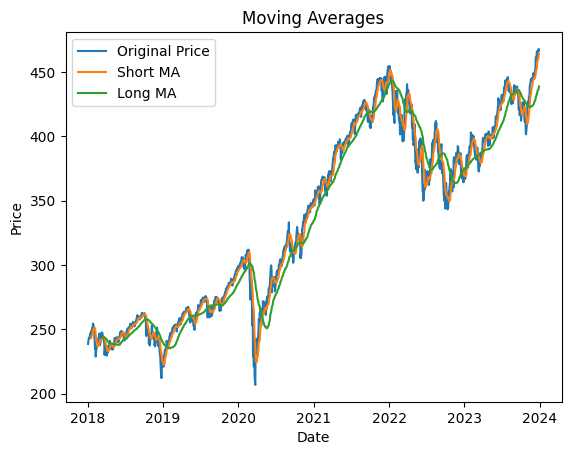

In [ ]:
import matplotlib.pyplot as plt

# Plot original data, Short and long MA
plt.plot(data['Close'], label='Original Price')
plt.plot(data['Short MA'], label='Short MA')
plt.plot(data['Long MA'], label='Long MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()